# Mohammad Yousuf Khawaja
# 20L-0946
# Assig 2

# Imports and Functions


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets as dt 
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


from scipy.cluster.hierarchy import linkage, fcluster

import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [4]:
def elbow_curve(dataset):
    dist = []
    for k in range(1, 11):
        model = KMeans(k)
        model.fit(dataset)
        dist.append(model.inertia_)

    plt.plot(list(range(1, 11)), dist)

In [ ]:
def dbscan_elbow_curve(data_set)
    nbrs = NearestNeighbors(n_neighbors=4).fit(data_set)
    distances, indices = nbrs.kneighbors(data_set)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances);

# Creating Data Sets

In [5]:
data_points = 1946 # 1000 + role number
random_state = 1946

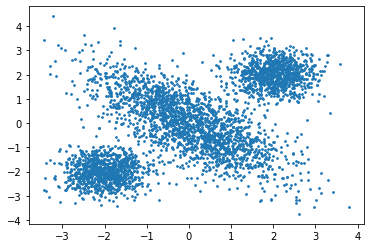

In [6]:
x1, y1 = dt.make_regression(n_samples= data_points, n_features=1, noise=.5, random_state = random_state)
# plot regression dataset
xy = np.c_[x1 ,y1]

noise = np.random.normal(0, .6, xy.shape)
xy= sk.preprocessing.StandardScaler().fit_transform(xy)

newArr =  xy + noise

x1 = -newArr[:,0]
y1 = newArr[:,1]

xy2, blob_labels = dt.make_blobs(n_samples= data_points, cluster_std=[0.5, 0.5], centers=[[-2, -2], [2, 2]], random_state=random_state)

x = np.r_[x1, xy2[:,0]]
y = np.r_[y1, xy2[:,1]]

temp_labels = np.ones(data_points) * 2

div_data_true_labels = np.r_[blob_labels, temp_labels]
div_data = np.c_[x,y]

# div_data || div_data_true_labels
plt.scatter(div_data[:,0], div_data[:,1], s =3);

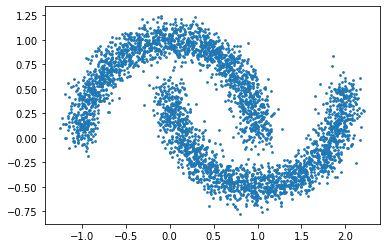

In [7]:
moons, moons_true_labels = dt.make_moons(n_samples= data_points * 2, noise= 0.1, random_state= random_state)

# moons || moons_true_labels
plt.scatter(moons[:,0], moons[:,1], s=3);

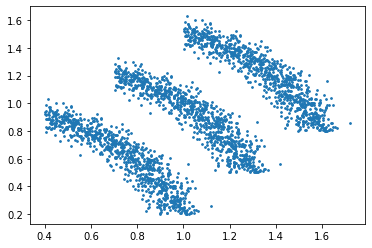

In [8]:
part_circles, part_circles_true_labels = dt.make_circles(n_samples= data_points * 3, noise= .05, random_state= random_state, factor= .99)

part_circles = part_circles[(part_circles[:,0] > .4) & (part_circles[:,1] > .2)]
part_circles_true_labels = np.zeros(part_circles.shape[0])

part_circles = np.r_[part_circles, part_circles + .3, part_circles + .6]

part_circles_true_labels[part_circles_true_labels == 1] = 0
part_circles_true_labels = np.r_[part_circles_true_labels, part_circles_true_labels + 1, part_circles_true_labels + 2]

# part_circles || part_circles_true_labels
plt.scatter(part_circles[:,0], part_circles[:,1], s=3);

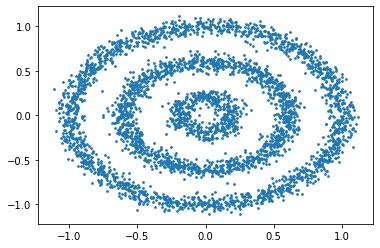

In [9]:
circles_small, circles_smalls_true_labels = dt.make_circles(n_samples= (int)(data_points*.25 * 2), noise= .05, random_state= random_state, factor= .2)
circles_large, circles_large_true_labels = dt.make_circles(n_samples= (int)(data_points *.75 * 2), noise= .05, random_state= random_state , factor= .6)

circles = np.r_[circles_small, circles_large]

circles_large_true_labels[circles_large_true_labels == 1] = 2
circles_true_labels = np.r_[circles_smalls_true_labels, circles_large_true_labels]

# circles || circles_true_labels
plt.scatter(circles[:,0], circles[:,1], s=3);

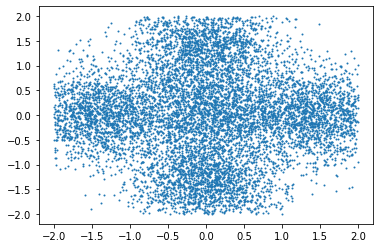

In [10]:
centers = [[2, 0], [-2, 0], [0, -2], [0, 2], [0,0]]
wall, wall_true_labels = dt.make_blobs(n_samples= data_points * 5, centers=centers, cluster_std=.7)
wall = sk.preprocessing.StandardScaler().fit_transform(wall)

x = wall[:,0]
y = wall[:,1]

x_filter = (x < 2) & (x > -2)
y_filter = (y < 2) & (y > -2)

wall_true_labels = wall_true_labels[x_filter & y_filter]
wall = wall[ x_filter & y_filter ]

# wall || wall_true_labels
plt.scatter(wall[:,0], wall[:,1], s = 1);

# Applying Clustering Methods


## Dataset 1

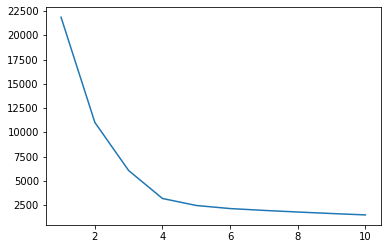

In [11]:
# div_data || div_data_true_labels
df1 = div_data
df1_true_labels = div_data_true_labels
elbow_curve(df1)

73.3 ms ± 7.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


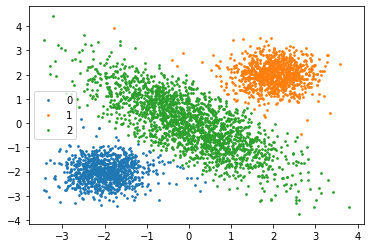

Purity: 0.7438335046248715


In [12]:
%timeit KMeans(n_clusters= 3, random_state= random_state).fit_predict(df1)
 

kmeans_df1 = KMeans(n_clusters= 3, random_state= random_state)
kmeans_df1_labels = kmeans_df1.fit_predict(df1)
kmeans_df1_unique_labels = np.unique(kmeans_df1_labels)

for i in kmeans_df1_unique_labels:
      plt.scatter(df1[kmeans_df1_labels == i , 0] , df1[kmeans_df1_labels == i , 1] , label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df1_true_labels, kmeans_df1_labels)
print(f"Purity: {purity}")

239 ms ± 61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


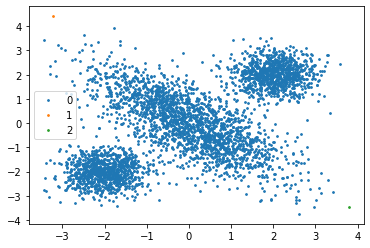

Purity: 0.5005138746145941


In [13]:
%timeit AgglomerativeClustering(linkage= "single", n_clusters= 3).fit_predict(df1)

single_df1 = AgglomerativeClustering(linkage= "single", n_clusters= 3)
single_df1_labels = single_df1.fit_predict(df1)
single_df1_unique_labels = np.unique(single_df1_labels)

for i in single_df1_unique_labels:
    plt.scatter(df1[single_df1_labels == i, 0], df1[single_df1_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df1_true_labels, single_df1_labels)
print(f"Purity: {purity}")

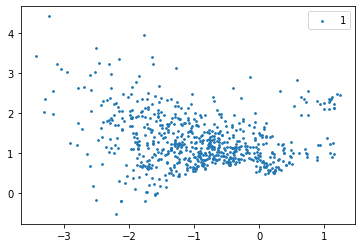

Purity: 0.5757965056526207


In [14]:
# %timeit AgglomerativeClustering(linkage= "complete", n_clusters= 3).fit_predict(df1)

complete_df1 = AgglomerativeClustering(linkage= "complete", n_clusters= 3)
complete_df1_labels = complete_df1.fit_predict(df1)
complete_df1_unique_labels = np.unique(complete_df1_labels)

complete_df1_unique_labels = [1]


for i in complete_df1_unique_labels:
    plt.scatter(df1[complete_df1_labels == i, 0], df1[complete_df1_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df1_true_labels, complete_df1_labels)
print(f"Purity: {purity}")

823 ms ± 187 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


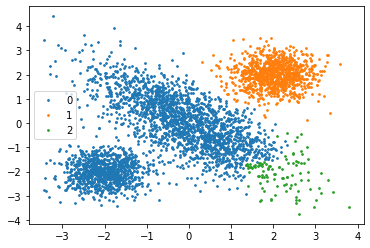

Purity: 0.5154162384378211


In [15]:
%timeit AgglomerativeClustering(linkage= "average", n_clusters= 3).fit_predict(df1)

average_df1 = AgglomerativeClustering(linkage= "average", n_clusters= 3)
average_df1_labels = average_df1.fit_predict(df1)
average_df1_unique_labels = np.unique(average_df1_labels)

for i in average_df1_unique_labels:
    plt.scatter(df1[average_df1_labels == i, 0], df1[average_df1_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df1_true_labels, average_df1_labels)
print(f"Purity: {purity}")

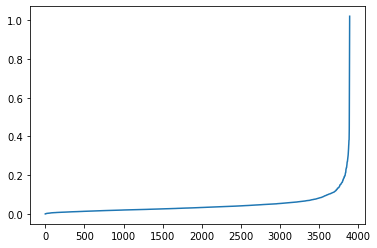

In [46]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(df1)
distances, indices = nbrs.kneighbors(df1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

110 ms ± 30.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


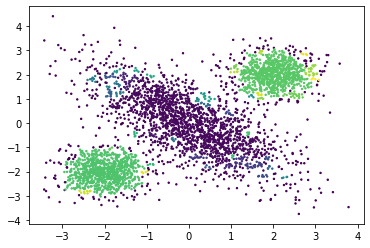

Purity: 0.7096608427543679


In [17]:
epsilon = 0.1
min_nodes = 4
%timeit DBSCAN(epsilon, min_samples= min_nodes).fit_predict(df1)

db = DBSCAN(epsilon, min_samples= min_nodes)
dbscan_df1_labels = db.fit_predict(df1)

plt.scatter(df1[:,0], df1[:,1], c=dbscan_df1_labels, marker="o", picker=True, s= 2)
plt.show()

purity = purity_score(df1_true_labels, dbscan_df1_labels)
print(f"Purity: {purity}")

## Dataset 2

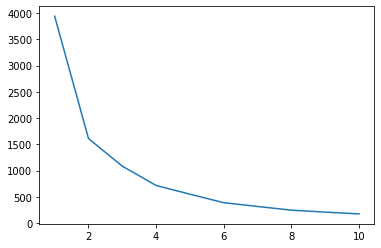

In [18]:
# moons || moons_true_labels

df2 = moons
df2_true_labels = moons_true_labels

elbow_curve(df2)

66.4 ms ± 3.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


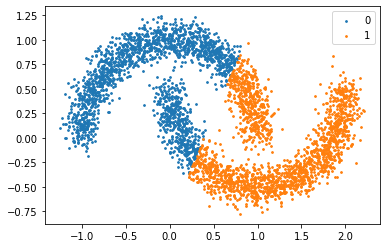

Purity: 0.7530832476875642


In [19]:
%timeit KMeans(n_clusters= 2, random_state= random_state).fit_predict(df2)
 

kmeans_df2 = KMeans(n_clusters= 2, random_state= random_state)
kmeans_df2_labels = kmeans_df2.fit_predict(df2)
kmeans_df2_unique_labels = np.unique(kmeans_df2_labels)

for i in kmeans_df2_unique_labels:
      plt.scatter(df2[kmeans_df2_labels == i , 0] , df2[kmeans_df2_labels == i , 1] , label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df2_true_labels, kmeans_df2_labels)
print(f"Purity: {purity}")

246 ms ± 25.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


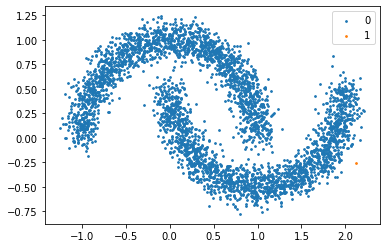

Purity: 0.500256937307297


In [20]:
%timeit AgglomerativeClustering(linkage= "single", n_clusters= 2).fit_predict(df2)

single_df2 = AgglomerativeClustering(linkage= "single", n_clusters= 2)
single_df2_labels = single_df2.fit_predict(df2)
single_df2_unique_labels = np.unique(single_df2_labels)

for i in single_df2_unique_labels:
    plt.scatter(df2[single_df2_labels == i, 0], df2[single_df2_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df2_true_labels, single_df2_labels)
print(f"Purity: {purity}")

1.05 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


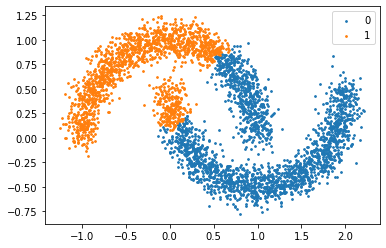

Purity: 0.7854573484069887


In [21]:
%timeit AgglomerativeClustering(linkage= "complete", n_clusters= 2).fit_predict(df2)

complete_df2 = AgglomerativeClustering(linkage= "complete", n_clusters= 2)
complete_df2_labels = complete_df2.fit_predict(df2)
complete_df2_unique_labels = np.unique(complete_df2_labels)

for i in complete_df2_unique_labels:
    plt.scatter(df2[complete_df2_labels == i, 0], df2[complete_df2_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df2_true_labels, complete_df2_labels)
print(f"Purity: {purity}")

1.41 s ± 306 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


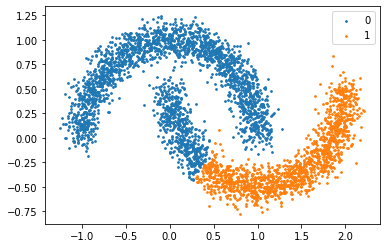

Purity: 0.854830421377184


In [22]:
%timeit AgglomerativeClustering(linkage= "average", n_clusters= 2).fit_predict(df2)

average_df2 = AgglomerativeClustering(linkage= "average", n_clusters= 2)
average_df2_labels = average_df2.fit_predict(df2)
average_df2_unique_labels = np.unique(average_df2_labels)

for i in average_df2_unique_labels:
    plt.scatter(df2[average_df2_labels == i, 0], df2[average_df2_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df2_true_labels, average_df2_labels)
print(f"Purity: {purity}")

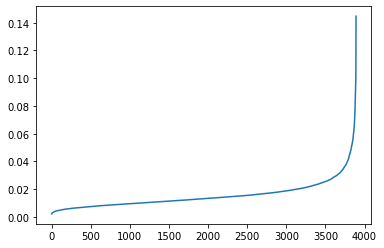

In [23]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(df2)
distances, indices = nbrs.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = [np.average(x) for  x in distances ]
plt.plot(distances);

76.1 ms ± 5.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


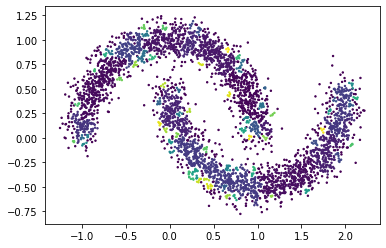

Purity: 0.9298561151079137


In [24]:
epsilon = 0.03
min_nodes = 4
%timeit DBSCAN(epsilon, min_samples= min_nodes).fit_predict(df2)

db = DBSCAN(epsilon, min_samples= min_nodes)
dbscan_df2_labels = db.fit_predict(df2)

# Cleaning out noise
# df2_cleaned = df2[labels != -1]
# labels = labels[labels != -1]

plt.scatter(df2[:,0], df2[:,1], c=dbscan_df2_labels, marker="o", picker=True, s= 2)
plt.show()

purity = purity_score(df2_true_labels, dbscan_df2_labels)
print(f"Purity: {purity}")



## Dataset 3

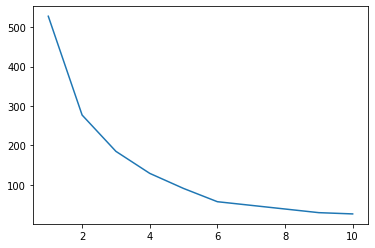

In [25]:
# part_circles || part_circles_true_labels
df3 = part_circles
df3_true_labels = part_circles_true_labels

elbow_curve(df3)

91 ms ± 6.77 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


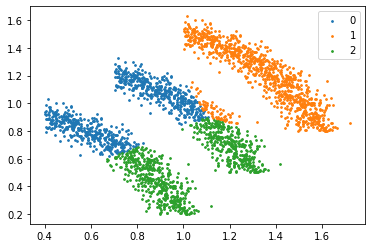

Purity: 0.6789434523809523


In [26]:
%timeit KMeans(n_clusters= 3, random_state= random_state).fit_predict(df3)
 

kmeans_df3 = KMeans(n_clusters= 3, random_state= random_state)
kmeans_df3_labels = kmeans_df3.fit_predict(df3)
kmeans_df3_unique_labels = np.unique(kmeans_df3_labels)

for i in kmeans_df3_unique_labels:
      plt.scatter(df3[kmeans_df3_labels == i , 0] , df3[kmeans_df3_labels == i , 1] , label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df3_true_labels, kmeans_df3_labels)
print(f"Purity: {purity}")

108 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


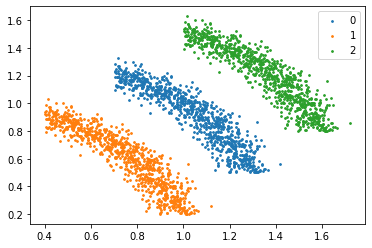

Purity: 1.0


In [27]:
%timeit AgglomerativeClustering(linkage= "single", n_clusters= 3).fit_predict(df3)

single_df3 = AgglomerativeClustering(linkage= "single", n_clusters= 3)
single_df3_labels = single_df3.fit_predict(df3)
single_df3_unique_labels = np.unique(single_df3_labels)

for i in single_df3_unique_labels:
    plt.scatter(df3[single_df3_labels == i, 0], df3[single_df3_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df3_true_labels, single_df3_labels)
print(f"Purity: {purity}")

351 ms ± 30.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


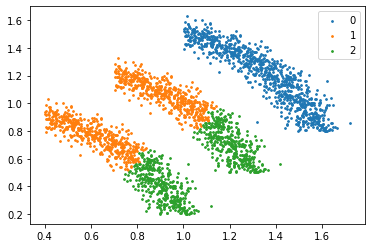

Purity: 0.6666666666666666


In [28]:
%timeit AgglomerativeClustering(linkage= "complete", n_clusters= 3).fit_predict(df3)

complete_df3 = AgglomerativeClustering(linkage= "complete", n_clusters= 3)
complete_df3_labels = complete_df3.fit_predict(df3)
complete_df3_unique_labels = np.unique(complete_df3_labels)

for i in complete_df3_unique_labels:
    plt.scatter(df3[complete_df3_labels == i, 0], df3[complete_df3_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df3_true_labels, complete_df3_labels)
print(f"Purity: {purity}")

376 ms ± 71.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


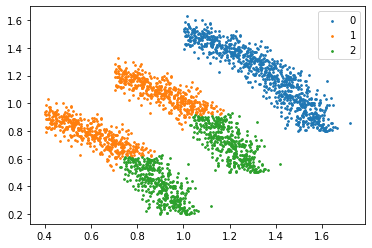

Purity: 0.6666666666666666


In [29]:
%timeit AgglomerativeClustering(linkage= "average", n_clusters= 3).fit_predict(df3)

average_df3 = AgglomerativeClustering(linkage= "average", n_clusters= 3)
average_df3_labels = average_df3.fit_predict(df3)
average_df3_unique_labels = np.unique(average_df3_labels)

for i in average_df3_unique_labels:
    plt.scatter(df3[average_df3_labels == i, 0], df3[average_df3_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df3_true_labels, average_df3_labels)
print(f"Purity: {purity}")

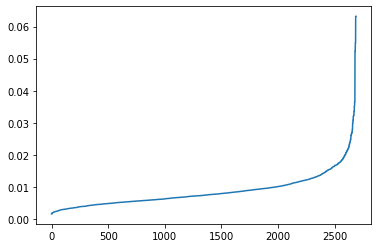

In [30]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(df3)
distances, indices = nbrs.kneighbors(df3)
distances = np.sort(distances, axis=0)
distances = [np.average(x) for  x in distances ]
plt.plot(distances);

85.6 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


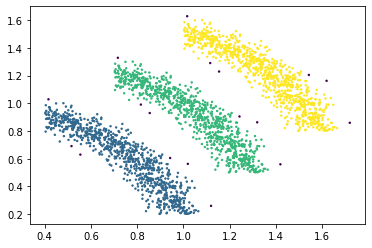

Purity: 0.9955357142857143


In [31]:
epsilon = 0.04
min_nodes = 4
%timeit DBSCAN(epsilon, min_samples= min_nodes).fit_predict(df3)

db = DBSCAN(epsilon, min_samples= min_nodes)
dbscan_df3_labels = db.fit_predict(df3)

plt.scatter(df3[:,0], df3[:,1], c=dbscan_df3_labels, marker="o", picker=True, s= 2)
plt.show()

purity = purity_score(df3_true_labels, dbscan_df3_labels)
print(f"Purity: {purity}")

## Dataset 4

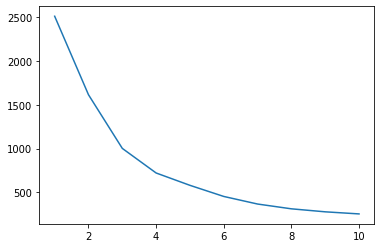

In [32]:
# circles || circles_true_labels

df4 = circles
df4_true_labels = circles_true_labels

elbow_curve(df4)

83.2 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


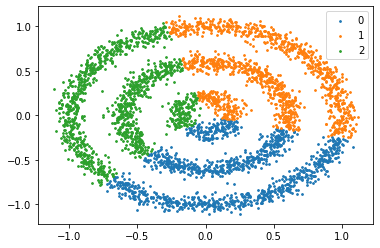

Purity: 0.49974306269270297


In [33]:
%timeit KMeans(n_clusters= 3, random_state= random_state).fit_predict(df4)
 

kmeans_df4 = KMeans(n_clusters= 3, random_state= random_state)
kmeans_df4_labels = kmeans_df4.fit_predict(df4)
kmeans_df4_unique_labels = np.unique(kmeans_df4_labels)

for i in kmeans_df4_unique_labels:
      plt.scatter(df4[kmeans_df4_labels == i , 0] , df4[kmeans_df4_labels == i , 1] , label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df4_true_labels, kmeans_df4_labels)
print(f"Purity: {purity}")

381 ms ± 89.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


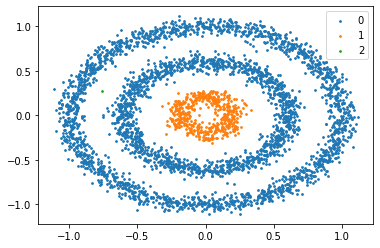

Purity: 0.6248715313463515


In [34]:
%timeit AgglomerativeClustering(linkage= "single", n_clusters= 3).fit_predict(df4)

single_df4 = AgglomerativeClustering(linkage= "single", n_clusters= 3)
single_df4_labels = single_df4.fit_predict(df4)
single_df4_unique_labels = np.unique(single_df4_labels)

for i in single_df4_unique_labels:
    plt.scatter(df4[single_df4_labels == i, 0], df4[single_df4_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df4_true_labels, single_df4_labels)
print(f"Purity: {purity}")

1.2 s ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


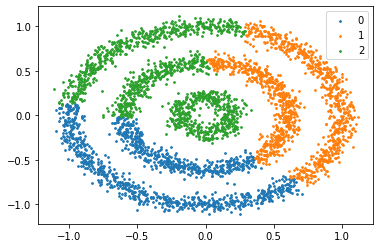

Purity: 0.49974306269270297


In [35]:
%timeit AgglomerativeClustering(linkage= "complete", n_clusters= 3).fit_predict(df4)

complete_df4 = AgglomerativeClustering(linkage= "complete", n_clusters= 3)
complete_df4_labels = complete_df4.fit_predict(df4)
complete_df4_unique_labels = np.unique(complete_df4_labels)

for i in complete_df4_unique_labels:
    plt.scatter(df4[complete_df4_labels == i, 0], df4[complete_df4_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df4_true_labels, complete_df4_labels)
print(f"Purity: {purity}")

1.44 s ± 295 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


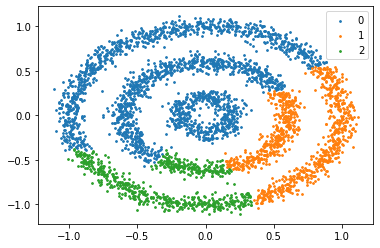

Purity: 0.49974306269270297


In [36]:
%timeit AgglomerativeClustering(linkage= "average", n_clusters= 3).fit_predict(df4)

average_df4 = AgglomerativeClustering(linkage= "average", n_clusters= 3)
average_df4_labels = average_df4.fit_predict(df4)
average_df4_unique_labels = np.unique(average_df4_labels)

for i in average_df4_unique_labels:
    plt.scatter(df4[average_df4_labels == i, 0], df4[average_df4_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df4_true_labels, average_df4_labels)
print(f"Purity: {purity}")

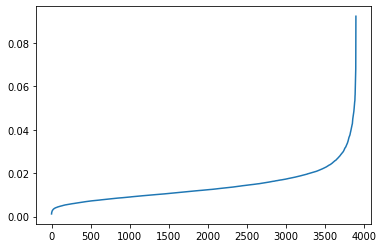

In [37]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(df4)
distances, indices = nbrs.kneighbors(df4)
distances = np.sort(distances, axis=0)
distances = [np.average(x) for  x in distances ]
plt.plot(distances);

91.5 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


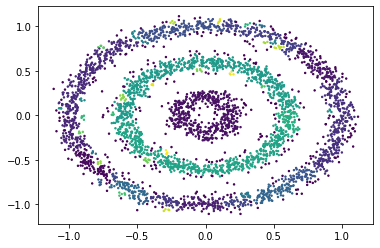

Purity: 0.9591469681397738


In [38]:
epsilon = 0.03
min_nodes = 4
%timeit DBSCAN(epsilon, min_samples= min_nodes).fit_predict(df4)

db = DBSCAN(epsilon, min_samples= min_nodes)
dbscan_df4_labels = db.fit_predict(df4)

plt.scatter(df4[:,0], df4[:,1], c=dbscan_df4_labels, marker="o", picker=True, s= 2)
plt.show()

purity = purity_score(df4_true_labels, dbscan_df4_labels)
print(f"Purity: {purity}")

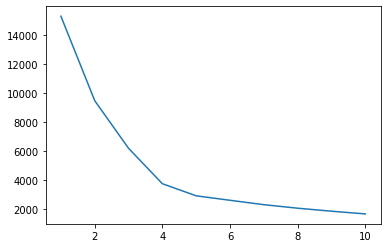

In [39]:
# wall || wall_true_labels

df5 = wall
df5_true_labels = wall_true_labels

elbow_curve(df5)

291 ms ± 74.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


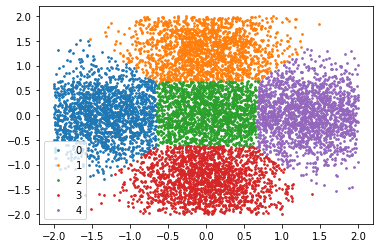

Purity: 0.8538306451612904


In [40]:
%timeit KMeans(n_clusters= 5, random_state= random_state).fit_predict(df5)
 

kmeans_df5 = KMeans(n_clusters= 5, random_state= random_state)
kmeans_df5_labels = kmeans_df5.fit_predict(df5)
kmeans_df5_unique_labels = np.unique(kmeans_df5_labels)

for i in kmeans_df5_unique_labels:
      plt.scatter(df5[kmeans_df5_labels == i , 0] , df5[kmeans_df5_labels == i , 1] , label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df5_true_labels, kmeans_df5_labels)
print(f"Purity: {purity}")

1.23 s ± 70.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


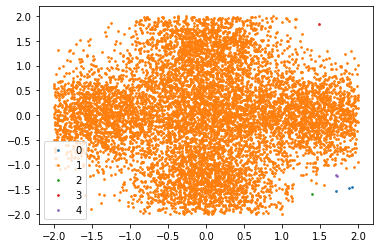

Purity: 0.21863799283154123


In [41]:
%timeit AgglomerativeClustering(linkage= "single", n_clusters= 5).fit_predict(df5)

single_df5 = AgglomerativeClustering(linkage= "single", n_clusters= 5)
single_df5_labels = single_df5.fit_predict(df5)
single_df5_unique_labels = np.unique(single_df5_labels)

for i in single_df5_unique_labels:
    plt.scatter(df5[single_df5_labels == i, 0], df5[single_df5_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df5_true_labels, single_df5_labels)
print(f"Purity: {purity}")

5.11 s ± 890 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


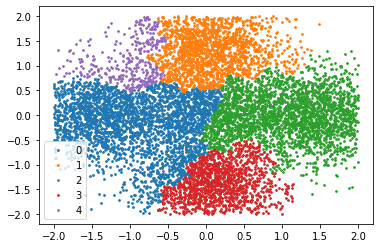

Purity: 0.6852598566308243


In [42]:
%timeit AgglomerativeClustering(linkage= "complete", n_clusters= 5).fit_predict(df5)

complete_df5 = AgglomerativeClustering(linkage= "complete", n_clusters= 5)
complete_df5_labels = complete_df5.fit_predict(df5)
complete_df5_unique_labels = np.unique(complete_df5_labels)

for i in complete_df5_unique_labels:
    plt.scatter(df5[complete_df5_labels == i, 0], df5[complete_df5_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df5_true_labels, complete_df5_labels)
print(f"Purity: {purity}")

5.59 s ± 1.09 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


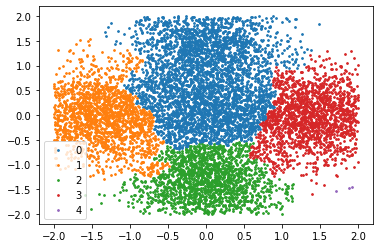

Purity: 0.6994847670250897


In [43]:
%timeit AgglomerativeClustering(linkage= "average", n_clusters= 5).fit_predict(df5)

average_df5 = AgglomerativeClustering(linkage= "average", n_clusters= 5)
average_df5_labels = average_df5.fit_predict(df5)
average_df5_unique_labels = np.unique(average_df5_labels)

for i in average_df5_unique_labels:
    plt.scatter(df5[average_df5_labels == i, 0], df5[average_df5_labels == i, 1], label= i, s= 3)

plt.legend()
plt.show()

purity = purity_score(df5_true_labels, average_df5_labels)
print(f"Purity: {purity}")

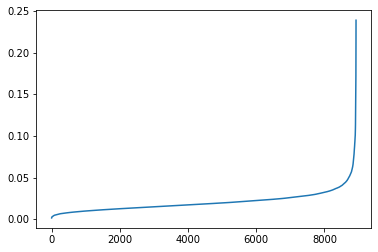

In [44]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(df5)
distances, indices = nbrs.kneighbors(df5)
distances = np.sort(distances, axis=0)
distances = [np.average(x) for  x in distances ]
plt.plot(distances);

137 ms ± 26.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


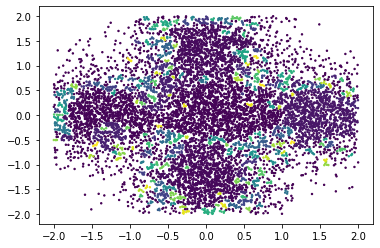

Purity: 0.6769713261648745


In [45]:
epsilon = 0.04
min_nodes = 4
%timeit DBSCAN(epsilon, min_samples= min_nodes).fit_predict(df5)

db = DBSCAN(epsilon, min_samples= min_nodes)
dbscan_df5_labels = db.fit_predict(df5)

plt.scatter(df5[:,0], df5[:,1], c=dbscan_df5_labels, marker="o", picker=True, s= 2)
plt.show()

purity = purity_score(df5_true_labels, dbscan_df5_labels)
print(f"Purity: {purity}")